First, load the data, from the supplied data file

In [71]:
import pandas as pd
data = pd.read_csv("restaurant_data_reordered.csv")
#print(data.head())
#print(data.tail())
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,16.29,3.71,Male,No,Sun,Dinner,3
5,16.97,3.50,Female,No,Sun,Dinner,3
6,20.65,3.35,Male,No,Sat,Dinner,3
7,17.92,4.08,Male,No,Sat,Dinner,2
8,20.29,2.75,Female,No,Sat,Dinner,2
9,15.77,2.23,Female,No,Sat,Dinner,2


# Cleaning

The data had some some strange things in. Write down all of the strange things that you found here:


### I found the following strange things:
* The "sex" column values are inconsistent (there's a mixture of "Lady," "Man," "Male" and "Female")
* There's a tip for 9999.0, which is 100% of the bill, so that must be a mistaken data entry
* The days are not consistently represented (for example, "Thursday" and "Thurday" vs. "Sun" and "Fri")
* Some tip amounts are negative values, even though money cannot have a value less than zero

Now, clean the data. Use a separate cell for each operation, and use a text cell to explain _why_ you are doing each operation

First, I'm removing the rows with equivalent tip & total_bill values (both 9999.0).  This is because the tip should be a fraction of the total bill, so there must be a mistake in the data.

In [72]:
rowToRemove = data[data.iloc[:, 0] == 9999]
indexToRemove = rowToRemove.index[0]

data = data.drop(indexToRemove)

assert data.iloc[indexToRemove, 0] != 9999, "The data should no longer have a total bill value of 9999"
assert len(list(data.iloc[:, 0])) == 243, "There should be one less row in the data (243 rows total)"

data.iloc[indexToRemove]  # labels are no longer continuous (indexToRemove is skipped in the data now)

#NOTES
#data

total_bill       13.16
tip               2.75
sex             Female
smoker              No
day           Thursday
time             Lunch
size                 2
Name: 78, dtype: object

Next, I am changing the labels so they read continuously from 0 to 243, because currently they read from 0 to 244 with one number skipped.  Then I'm changing all "Lady" sex values to "Female" and all "Man" sex values to "Male" so the naming conventions are consistent in all rows.  Finally, I'm changing all day values to three-letter abbreviations so the naming conventions are consistent in all rows, and I'm changing any money amounts with negative values to positive values (because money can't be less than zero).

In [73]:
# Continuous labels (0 through 243, inclusive)
colLabels = []
for n in range(0, 243):
    colLabels += [n]

data.insert(0, 'label', colLabels)
data.set_index('label', inplace=True)


# Consistent naming conventions for sex (Male or Female)
data.replace("Lady", "Female", inplace=True)
data.replace("Man", "Male", inplace=True)


dayToChange = []
for index, row in data.iterrows():
    # Ensure all bill amounts are non-negative
    initialBill = row['total_bill']
    if initialBill < 0:
        newBill = (-1) * (initialBill)
        data.replace(initialBill, newBill, inplace=True)
    
    # Ensure all tip amounts are non-negative
    initialTip = row['tip']
    if initialTip < 0:
        newTip = (-1) * (initialTip)
        data.replace(initialTip, newTip, inplace=True)
    
    # Consistent naming convention for day (three-letter abbreviation)
    if (len(row['day'])) != 3:
        dayToChange += [row['day']]

for d in dayToChange:
    data.replace(d, d[0:3], inplace=True)


#NOTES
#print(colLabels)

#print(data['sex'].value_counts())
#print('Sex column index: ', list(data.columns).index('sex'))
#print(data['sex'][243])
#print(data.shape)
#print(data.iloc[:, 2])
#data.iloc[0:244, [2]]
#assert list(data.iloc[[0], [2]]) == ["Female"]

# Obtain the column index for "sex"
#sexColI = list(data.columns).index('sex')
#assert sexColI == 2, "The column index of 'sex' should be 2"
#sexValues = list(data.iloc[0:, 2])
#for i in range(0, len(sexValues)):
#    if sexValues[i] == 'Lady':
#        sexValues[i] = "Female"
#    elif sexValues[i] == "Man":
#        sexValues[i] = "Male"
#print(sexValues)          
#data["sex"] = data["sex"].map(sexValues)

Now that your data is clean, use some assert statements to check that it fits your picture of how the data should be. Make sure each assert explains why it is there. You should have several asserts, for all of the things that you found in the data that were strange.

In [74]:
# Make sure there are labels 0-243
assert len(colLabels) == 243, "There should be 243 total column labels"
assert colLabels[-1] == 242, "The last column label should be 242"

# Make sure the values in the column 'sex' are consistent
for index, row in data.iterrows():
    #print(row['sex'])
    assert row['sex'] != 'Lady', "All 'Lady' values should now read 'Female'"
    assert row['sex'] != "Man", "All 'Man' values should now read 'Male'"

# Make sure the values in the column 'day' are consistent
# and all money amounts are non-negative values
for index,row in data.iterrows():
    assert (len(row['day']) == 3), "All 'day' values should be abbreviated to three letters"
    assert (row['total_bill'] >= 0), "Bills should not have negative values"
    assert (row['tip'] >= 0), "Tips should not have negative values"

# Simple Statistical Questions
For each of these, we want a command that just prints the relevant answer. The first one has been filled out as an example


How many rows are in the dataset after cleaning?

In [75]:
data.shape[0] # Simply count the number of rows using shape, and select the first element

243

What is the total amount of tips given?

In [76]:
data['tip'].sum()

729.57999999999993

What is the largest group?

In [77]:
data['size'].max()

6

How many bills were paid by males, and how many by females?

In [78]:
print("Bills Paid by Sex")
print("Male: ", (data['sex'].value_counts())[0])
print("Female: ", (data['sex'].value_counts())[1])


#NOTES
#data['sex'].value_counts()

Bills Paid by Sex
Male:  156
Female:  87


What is the average percentage of the bill that people add as a tip?

In [79]:
data['tip_percentage'] = (data.tip / data.total_bill) * 100
dataCols = list(data.columns)
colToMove = dataCols[(len(dataCols)-1)]
dataCols.insert(1, dataCols.pop((len(dataCols)-1)))
dataCols

data = data[dataCols]

print("Average percentage of bill added as tip:", data['tip_percentage'].mean())
data


#NOTES
#billAndTip = data.iloc[0:, (0,1)]
#tipPercent = []
#for label, row in billAndTip.iterrows():
#    tipPercent += [(row[1]/row[0])*100]
#print(tipPercent)
#assert len(tipPercent) == 244, "There should be 244 tip percentages"
#data['tip percentage'] = tipPercent
#data.insert(2, 'tip_percentage', tipPercent)
#data = data.iloc[:, 0:7]

#dataCols = dataCols[0:(len(dataCols)-1)]
#data[dataCols[0:2], [colToMove], dataCols[2:]]
#data



Average percentage of bill added as tip: 16.094991745


,total_bill,tip_percentage,tip,sex,smoker,day,time,size
label,,,,,,,,
0,16.99,5.944673,1.01,Female,No,Sun,Dinner,2
1,10.34,16.054159,1.66,Male,No,Sun,Dinner,3
2,21.01,16.658734,3.50,Male,No,Sun,Dinner,3
3,23.68,13.978041,3.31,Male,No,Sun,Dinner,2
4,16.29,22.774708,3.71,Male,No,Sun,Dinner,3
5,16.97,20.624632,3.50,Female,No,Sun,Dinner,3
6,20.65,16.222760,3.35,Male,No,Sat,Dinner,3
7,17.92,22.767857,4.08,Male,No,Sat,Dinner,2
8,20.29,13.553475,2.75,Female,No,Sat,Dinner,2


What is the largest tip?

In [80]:
# Largest tip by amount
maxTip = data['tip'].max()
print("Largest Tip Amount:", maxTip)

# Largest tip by percentage
maxTipPercent = data['tip_percentage'].max()
print("Largest Tip Percentage:", str(maxTipPercent)+"%")


#NOTES
#data

Largest Tip Amount: 10.0
Largest Tip Percentage: 71.0344827586%


What day of the week was the largest tip given on?

In [81]:
print('Largest Tip Amount Given On:\n', data[data['tip'] == maxTip].day)

print('\nLargest Tip Percentage Given On:\n', data[data['tip_percentage'] == maxTipPercent].day)

Largest Tip Amount Given On:
 label
108    Sat
Name: day, dtype: object

Largest Tip Percentage Given On:
 label
110    Sun
Name: day, dtype: object


Do males or females give more tips as an average of the bill? What is the difference?

In [82]:
femaleTipAmounts = []
femaleTipPercents = []
maleTipAmounts = []
maleTipPercents = []
for index, row in data.iterrows():
    if row['sex'] == 'Female':
        femaleTipAmounts += [row['tip']]
        femaleTipPercents += [row['tip_percentage']]
    else:
        maleTipAmounts += [row['tip']]
        maleTipPercents += [row['tip_percentage']]

assert len(femaleTipAmounts) == 87, "There should be 87 distinct tip amounts in the list for females"
assert len(maleTipPercents) == 156, "There should be 156 distinct tip percentages in the list for males"

avgFemaleTipAmount = (sum(femaleTipAmounts)) / (len(femaleTipAmounts))
avgMaleTipAmount = (sum(maleTipAmounts)) / (len(maleTipAmounts))

avgFemaleTipPercentage = (sum(femaleTipPercents)) / (len(femaleTipPercents))
avgMaleTipPercentage = (sum(maleTipPercents)) / (len(maleTipPercents))

# Calculate difference of tip amounts given by males vs. females
if avgFemaleTipAmount == avgMaleTipAmount:
    print("Females and males give the same tip amount on average.")
    print("The difference is zero.")
elif avgFemaleTipAmount > avgMaleTipAmount:
    print("Females give a greater tip amount on average than males.")
    print("The difference is ", avgFemaleTipAmount - avgMaleTipAmount)
else:
    print("Males give a greater tip amount on average than females.")
    print("The difference is ", avgMaleTipAmount - avgFemaleTipAmount)

print("\n")

# Calculate difference of tip percentages given by males vs. females
if avgFemaleTipPercentage == avgMaleTipPercentage:
    print("Females and males give a tip of the same percentage on average.")
    print("The difference is zero.")
elif avgFemaleTipPercentage > avgMaleTipPercentage:
    print("Females give tips of a greater percentage on average than males.")
    print("The difference is", str(avgFemaleTipPercentage - avgMaleTipPercentage)+"%")
else:
    print("Males give tips of a greater percentage on average than females.")
    print("The difference is", str(avgMaleTipPercentage - avgFemaleTipPercentage)+"%")


#NOTES
#print((data['sex'] == 'Female').value_counts())
#print(femaleTipAmounts)
#print(femaleTipPercents)
#print('\n')
#print(maleTipAmounts)
#print(maleTipPercents)

Males give a greater tip amount on average than females.
The difference is  0.2631542882404956


Females give tips of a greater percentage on average than males.
The difference is 0.8630890946394736%


Do smokers tip more at lunchtime than at dinnertime?

In [83]:
lunchData = data[(data.smoker == 'Yes') & (data.time == 'Lunch')]
dinnerData = data[(data.smoker == 'Yes') & (data.time == 'Dinner')]

lunchTipAmounts = []
lunchTipPercents = []
for index, row in lunchData.iterrows():
    lunchTipAmounts += [row['tip']]
    lunchTipPercents += [row['tip_percentage']]
    
dinnerTipAmounts = []
dinnerTipPercents = []
for index, row in dinnerData.iterrows():
    dinnerTipAmounts += [row['tip']]
    dinnerTipPercents += [row['tip_percentage']]

avgLunchTipAmount = (sum(lunchTipAmounts)) / (len(lunchTipAmounts))
avgDinnerTipAmount = (sum(dinnerTipAmounts)) / (len(dinnerTipAmounts))

avgLunchTipPercentage = (sum(lunchTipPercents)) / (len(lunchTipPercents))
avgDinnerTipPercentage = (sum(dinnerTipPercents)) / (len(dinnerTipPercents))

if avgLunchTipAmount == avgDinnerTipAmount:
    print("Based on tip amount, smokers tip the same at lunch and dinner on average.")
elif avgLunchTipAmount > avgDinnerTipAmount:
    print("Based on tip amount, smokers tip more at lunch on average than at dinner on average.")
else:
    print("Based on tip amount, smokers tip more at dinner on average than at lunch on average.")
    
if avgLunchTipPercentage == avgDinnerTipPercentage:
    print("Based on tip percentage, smokers tip the same at lunch and dinner on average.")
elif avgLunchTipPercentage > avgDinnerTipPercentage:
    print("Based on tip percentage, smokers tip more at lunch on average than at dinner on average.")
else:
    print("Based on tip percentage, smokers tip more at dinner on average than at lunch on average.")
    
    
#NOTES
#data[(data.time != 'Lunch') & (data.time != 'Dinner')]

Based on tip amount, smokers tip more at dinner on average than at lunch on average.
Based on tip percentage, smokers tip more at lunch on average than at dinner on average.


# Graphs
For all these questions, use a graph to illustrate your answer

What is the distribution of tips, and what is the distribution of total bills (plot on separate graphs). Hint: distplot

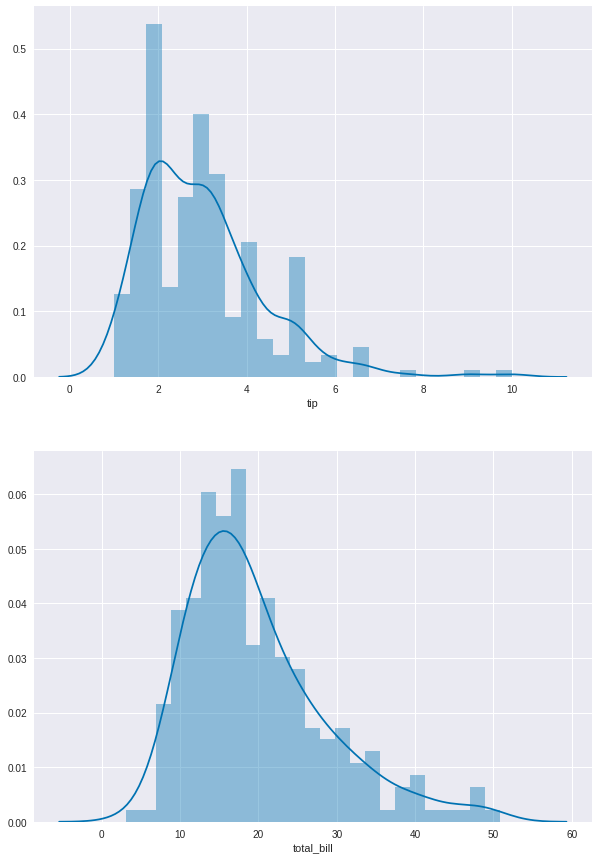

In [84]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", palette="colorblind", color_codes=True)
f, axes = plt.subplots(2, figsize=(10, 15), sharex=False)

tipData = data.iloc[:, 2] # tip amount
total_billData = data.iloc[:, 0] # total bill amount

ax1 = sns.distplot(tipData, bins=25, ax=axes[0])
ax2 = sns.distplot(total_billData, bins=25, ax=axes[1])

#NOTES
#ax1 = sns.distplot(tipData, bins=50, ax=axes[0])
#ax2 = sns.distplot(total_billData, bins=50, ax=axes[1])
#ax1 = sns.distplot(tipData, bins=10, ax=axes[0])
#ax2 = sns.distplot(total_billData, bins=10, ax=axes[1])
#ax1 = sns.distplot(tipData, kde=False, rug=True, ax=axes[0])
#ax2 = sns.distplot(total_billData, kde=False, rug=True, ax=axes[1])

Now plot them on the *same* plot, and add a legend. Hint: use attribute 'label' to give them names, and call legend() on one of the plots to draw the legend

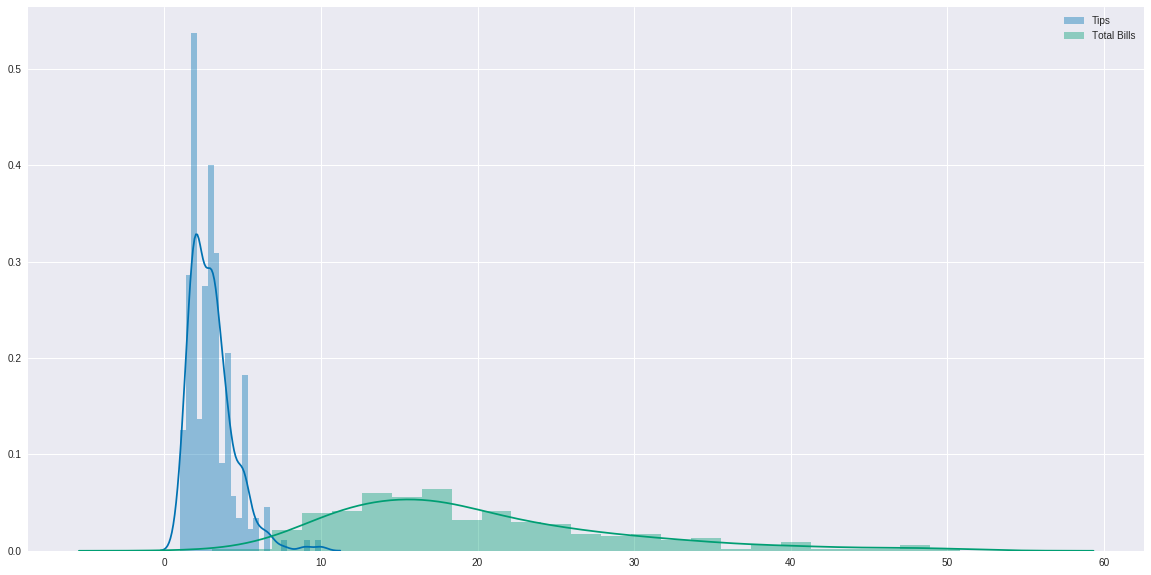

In [85]:
sns.set(style="darkgrid", palette="colorblind", color_codes=True)
f, axes = plt.subplots(1, figsize=(20, 10), sharex=False)

tipData = data.iloc[:, 2]
total_billData = data.iloc[:, 0]

sns.distplot(tipData, bins=25, axlabel=False, label="Tips")
sns.distplot(total_billData, bins=25, axlabel=False, label="Total Bills").legend()

#NOTES
#sns.distplot(tipData, bins=50, axlabel=False, label="Tips")
#sns.distplot(total_billData, bins=50, axlabel=False, label="Total Bills").legend()

Do people give different average tips on different days? (Have you calculated this relative to the size of the bill, or just the tip amount?) Hint: boxplot

The average tip percentages and tip amounts don't change much on different days.
Generally there is greater variation in tips given on weekends, with Saturday having the greatest number of outliers.


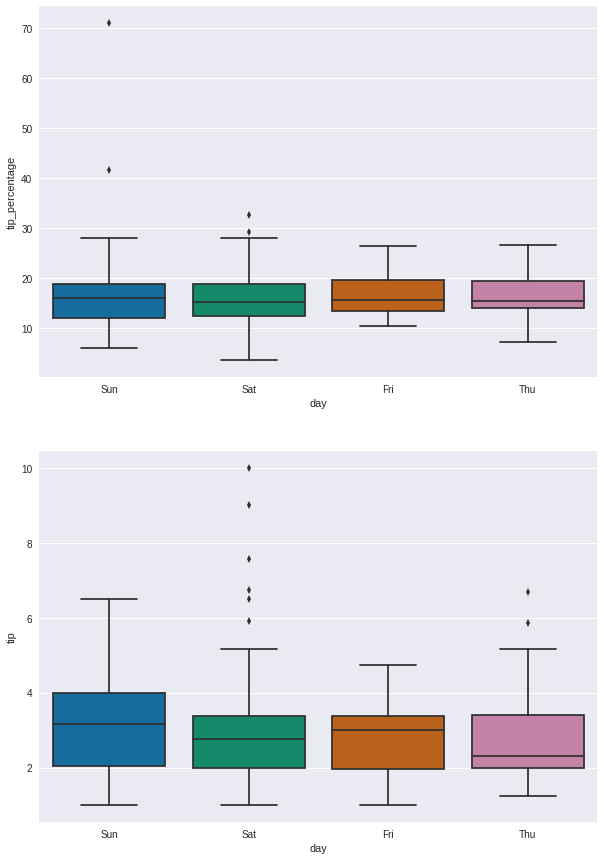

In [86]:
g, axes = plt.subplots(2, figsize=(10, 15), sharex=False)

sns.boxplot(x="day", y="tip_percentage", data=data, ax=axes[0])
sns.boxplot(x="day", y="tip", data=data, ax=axes[1])

print("The average tip percentages and tip amounts don't change much on different days.")
print("Generally there is greater variation in tips given on weekends, with Saturday having the greatest number of outliers.")

#NOTES
#sns.boxplot(x="day", y="tip", data=data)
#sns.boxplot(x="tip_percentage", y="tip", hue="day", data=data)

How does the size of the tip relate to the size of the bill? Hint: scatterplot, lmplot

Generally, tip size decreases as bill size increases.


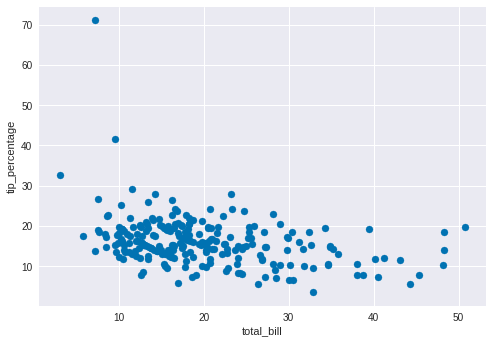

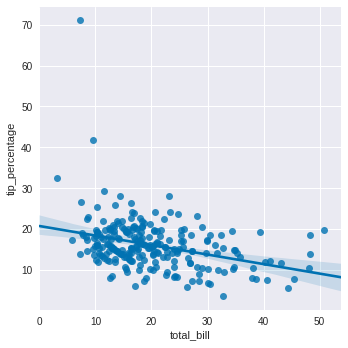

In [87]:
# To calculate tip relative to size of bill, tip percentage (rather than tip amount) should be used

plt.scatter(x="total_bill", y="tip_percentage", data=data)
plt.xlabel('total_bill')
plt.ylabel('tip_percentage')  

sns.lmplot(x="total_bill", y="tip_percentage", data=data)

print("Generally, tip size decreases as bill size increases.")

Does the proportion of the bill given as a tip relate to the number of people eating?

The proportion of the bill given as a tip doesn't have a strong relation to the number of people eating.
Individuals (party of 1) tend to give the largest tips.
Parties of 2 or more tend to give tips within a similar range.
Parties of 2 have the greatest variation in the tip given relative to the bill.


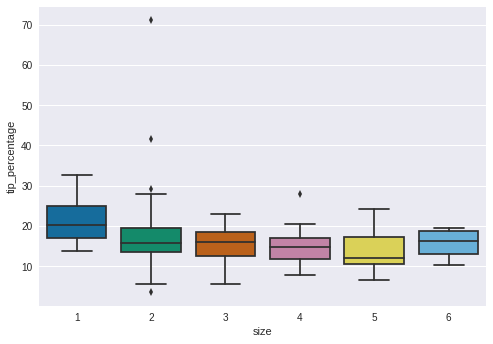

In [88]:
sns.boxplot(x="size", y="tip_percentage", data=data)
#plt.xlabel('size')
#plt.ylabel('tip_percentage')

print("The proportion of the bill given as a tip doesn't have a strong relation to the number of people eating.")
print("Individuals (party of 1) tend to give the largest tips.")
print("Parties of 2 or more tend to give tips within a similar range.")
print("Parties of 2 have the greatest variation in the tip given relative to the bill.")

Bonus Question: Create a boxplot showing total bills and tips for each day next to each other in a different colour.

Hint: use melt (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) to reshape the data, so that you have new dataset, with a column for the day, a column for the amount, and a type column that says whether it is a total_bill or a tip. Then you can boxplot that, and use the type column to set the color.

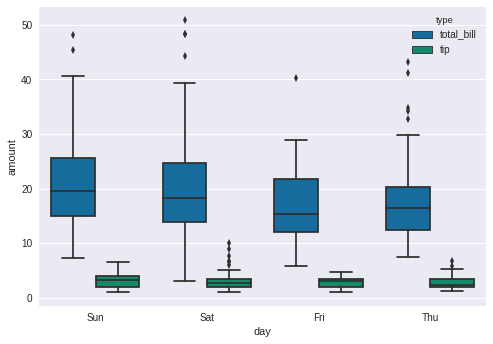

In [89]:
meltedData = pd.melt(data, id_vars=['day'], value_vars=['total_bill', 'tip'], var_name='type', value_name='amount')
#meltedData

sns.boxplot(x='day', y='amount', hue='type', data=meltedData)

# Open Question
Use 2 graphs and associated text to explain something else that you have found in the data. Try to relate it to causes, i.e. explain *why* the data might be this way.

Graph 1 Explanation:
The average size of a party is biggest on a Sunday and smallest on a Friday.
This could be due to the fact that families (which are typically larger parties than groups of friends)
go out together more on Sundays, and friends go out together more on Fridays.

Graph 2 Explanation:
On average, parties with a smoker are smaller than parties without a smoker.
This supports my hypothesis that as the size of a party increases,
it'd become increasingly difficult to find a party of all smokers.


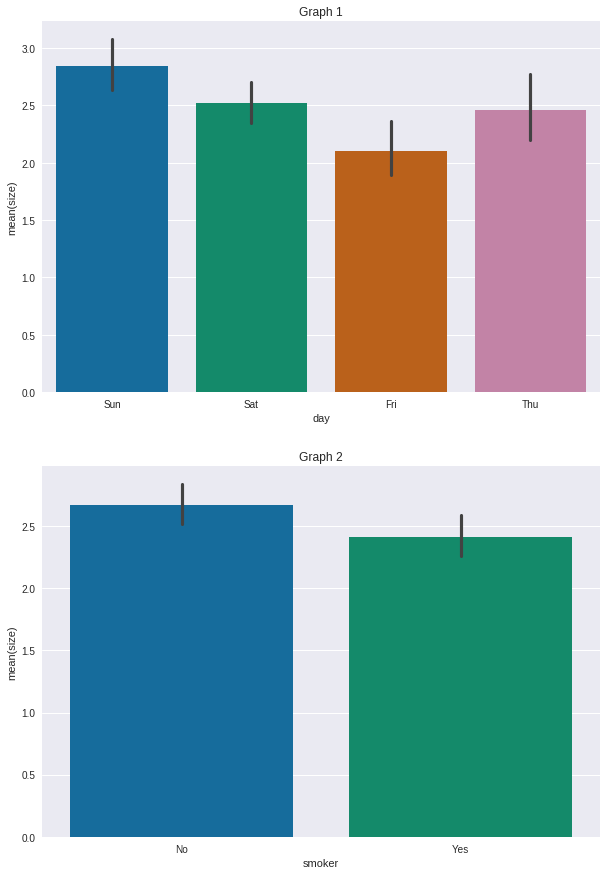

In [90]:
g, axes = plt.subplots(2, figsize=(10, 15), sharex=False)

sns.barplot(x='day', y='size', data=data, ax=axes[0]).set_title('Graph 1')
print("Graph 1 Explanation:")
print("The average size of a party is biggest on a Sunday and smallest on a Friday.")
print("This could be due to the fact that families (which are typically larger parties than groups of friends)")
print("go out together more on Sundays, and friends go out together more on Fridays.")

print('')

sns.barplot(x='smoker', y='size', data=data)
plt.title('Graph 2')
print("Graph 2 Explanation:")
print("On average, parties with a smoker are smaller than parties without a smoker.")
print("This supports my hypothesis that as the size of a party increases,")
print("it'd become increasingly difficult to find a party of all smokers.")

#NOTES
#sns.boxplot(x='day', y='size', hue='smoker', data=data)

# Reflection
Write up to 100 words about your experience and what you have learnt

I've learned that there are numerous approaches to executing a particular call or visualizing data in a particular way.  This assignment also reinforced the fact that we often obtain data in a format that does not suit our purposes with it, so it needs to be cleaned or rearranged before we can analyze it.  I've also learned that it's important to try multiple visualizations in order to have a holistic understanding of what's going on in the data.  One may need multiple visualizations to represent a single argument.

In [92]:
print("Whoohoo!  Assignment 1 complete.  Thank you for helping me learn to visualize data.")

Whoohoo!  Assignment 1 complete.  Thank you for helping me learn to visualize data.
